In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
from keras import backend
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


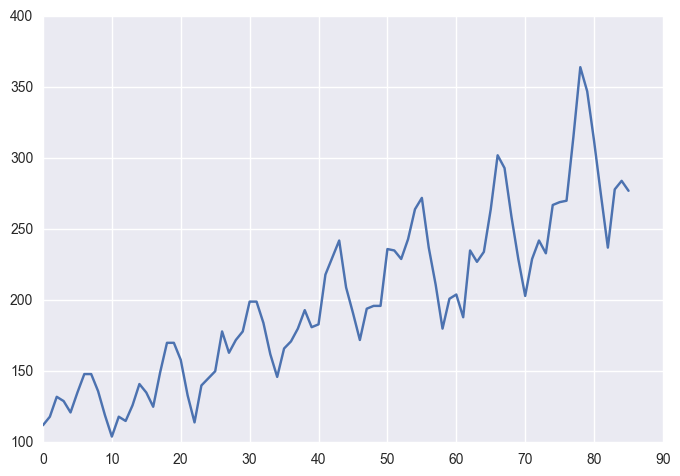

In [2]:
dataset = pd.read_csv('international-airline-passengers.csv', usecols = [1], engine ='python', skipfooter=3)
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()

In [3]:
#dataset = scale(dataset)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [13]:
train_size = int(len(dataset)*0.60)
test_size = len(dataset)-train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(dataset))
print(len(train), len(test))

86
51 35


In [5]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a= dataset[i:(i+look_back),0]
        b= dataset[i+look_back,0]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [6]:
look_back=1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
trainX = np.reshape(trainX, (trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1]))

In [8]:
model = Sequential()
model.add(LSTM(100, input_dim = look_back, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer ='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size = 1, verbose=2)

Epoch 1/100
12s - loss: 0.0338
Epoch 2/100
5s - loss: 0.0168
Epoch 3/100
5s - loss: 0.0159
Epoch 4/100
5s - loss: 0.0167
Epoch 5/100
5s - loss: 0.0111
Epoch 6/100
5s - loss: 0.0077
Epoch 7/100
5s - loss: 0.0055
Epoch 8/100
5s - loss: 0.0040
Epoch 9/100
5s - loss: 0.0043
Epoch 10/100
5s - loss: 0.0055
Epoch 11/100
5s - loss: 0.0046
Epoch 12/100
5s - loss: 0.0048
Epoch 13/100
5s - loss: 0.0044
Epoch 14/100
5s - loss: 0.0049
Epoch 15/100
5s - loss: 0.0040
Epoch 16/100
5s - loss: 0.0042
Epoch 17/100
5s - loss: 0.0043
Epoch 18/100
5s - loss: 0.0037
Epoch 19/100
5s - loss: 0.0043
Epoch 20/100
5s - loss: 0.0041
Epoch 21/100
5s - loss: 0.0051
Epoch 22/100
5s - loss: 0.0042
Epoch 23/100
6s - loss: 0.0041
Epoch 24/100
5s - loss: 0.0046
Epoch 25/100
5s - loss: 0.0050
Epoch 26/100
5s - loss: 0.0045
Epoch 27/100
5s - loss: 0.0038
Epoch 28/100
5s - loss: 0.0046
Epoch 29/100
5s - loss: 0.0042
Epoch 30/100
5s - loss: 0.0041
Epoch 31/100
5s - loss: 0.0040
Epoch 32/100
5s - loss: 0.0045
Epoch 33/100
5s 

In [9]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = np.reshape(trainPredict, (-1,1))
testPredict = np.reshape(testPredict, (-1,1))
trainY = np.reshape(trainY, (-1,1))
testY = np.reshape(testY, (-1,1))

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

print(np.shape(trainY), np.shape(trainPredict))


#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % (trainScore) )
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#print('Train Score: %.2f RMSE' % (testScore) )

(49, 1) (49, 1)


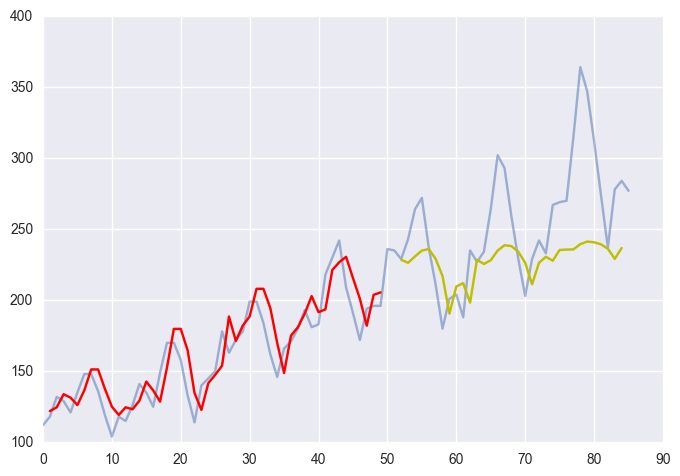

In [14]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), alpha=0.5)
plt.plot(trainPredictPlot, 'r')
plt.plot(testPredictPlot, 'y')
plt.show()